# Examples on how to use `carculator_truck`

Github: https://github.com/romainsacchi/carculator-truck/

Publication:

*Does size matter? The influence of size, load factor, range autonomy and application type on the Life Cycle Assessment of current and future trucks.*

Romain Sacchi, Christian Bauer, Brian Cox

Submitted to Environmental Science and Technology (*in review*)

# Truck model

Import the library

In [1]:
from carculator_truck import *
import matplotlib.pyplot as plt

Load the default vehicles parameters

In [2]:
tip = TruckInputParameters()

Define the calculation mode: static or stochastic(number of iterations)
* `static`: the model use one value for each parameter: the most likely value
* `stochastic`: the model uses a range of values pseudo-randomly generated on the basis of a probability distribution. The number of values generated is given by the integer argument passed to `.stochastic()`

In [3]:
tip.static()

Fill-in the array that will be used to create the car models

In [4]:
dcts, array = fill_xarray_from_input_parameters(tip)

We can check the powertrains, sizes and yaers considered

In [5]:
list(array.powertrain.values)

['BEV', 'FCEV', 'HEV-d', 'ICEV-d', 'ICEV-g', 'PHEV-c-d', 'PHEV-d', 'PHEV-e']

2000, 2010, 2020, 2030, 2040 and 2050 are the default years

In [6]:
list(array.year.values)

[2000, 2010, 2020, 2030, 2040, 2050]

And there are several size classes, refering to the gross vehicle weight (note that you cannot call the "size" dimension as previsouly done with "powertrain" and "year", because "size" also happens to be a property of the array object).

In [7]:
list(array.coords["size"].values)

['3.5t', '7.5t', '18t', '26t', '32t', '40t', '60t']

It is possible to derive truck models for other years by interpolating between two years. It is not advised to extrapolate beyond 2050 though.

In [8]:
array = array.interp(year=[2018, 2022, 2035],  kwargs={'fill_value': 'extrapolate'})

We can create now the truck models, using the default parameters, while specifying a driving cycle. Three driving cycles are available, and default range autonomy values are associated to each of these driving cycles:

* Urban delivery (150 km)
* Regional delivery (400 km)
* Long haul (800 km)

If not driving cycle is specified, "Urban delivery" is chosen.

In [9]:
tm = TruckModel(array, cycle='Long haul')

Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+------+
|                | 3.5t | 7.5t | 18t  | 26t  | 32t  | 40t  | 60t  |
+----------------+------+------+------+------+------+------+------+
|   BEV, 2018    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2022    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2035    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2018   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2022   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2035   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|  HEV-d, 2018   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|  HEV-d, 2022   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|  HEV-d, 2035   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|  ICEV-d, 2018  | 

We can easily plot the driving cycle, to have a idea...
Here are the first 100 seconds, for the truck sizes.

Text(0.5, 0, 'second')

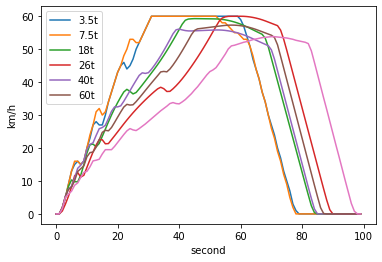

In [10]:
import matplotlib.pyplot as plt
plt.plot(get_standard_driving_cycle("Long haul")[:100])
plt.legend(["3.5t", "7.5t", "18t", "26t", "40t", "60t"])
plt.ylabel("km/h")
plt.xlabel("second")

Besides the driving cycle, `TruckModel` can also receive arguments relating to:
* the country of use, by specifying `country="SE"`
* the energy saving targets to achieve, by passing a dictionary of the form `{2025:.85, 2030:.7}`. These targets apply to diesel and natural gas vehicles, and the reference year is 2020. If none is passed, `{2025:.85, 2030:.7}` is chosen. It represents an improvement of the tank-to-wheel energy use of 30% by 2030, as being expected by the European Union. `carculator_truck` will gradually electrify the powertrains of the diesel and natural gas trucks until these targets are met. If you do not wish any such "forced" imporvement by hybridization of the powertrain, use `{2050:1}`.
* a fuel blend for each year for a specific vehicle, or for all of them. Fuel blends are specified as a dictionary.

Available fuels for fuel blends are:
* ICEV-d
    * diesel
    * biodiesel - cooking oil
    * biodiesel - algae
    * synthetic diesel
* ICEV-g
    * cng
    * biogas - sewage sludge
    * biogas - biowaste
    * syngas
* FCEV
    * electrolysis
    * smr - natural gas
    * smr - natural gas with CCS
    * smr - biogas
    * smr - biogas with CCS
    * atr - natural gas
    * atr - natural gas with CCS
    * atr - biogas
    * atr - biogas with CCS
    * coal gasification
    * wood gasification
    * wood gasification with CCS
    * wood gasification with EF
    * wood gasification with EF with CCS
    
Note: for BEV trucks, a custom electricity mix can be defined at a later stage. Also, if `electrolysis` is chosen as a fuel for FCEV, or if a synthetic fuel is chosen for ICEV-d or ICEV-g (`synthetic diesel`, `syngas`), the electricity mix defined will be used to produce the necessary hydrogen via electrolysis. If no user-defined electricity mix is passed, then the electricity correpsonding the country defined in `TruckModel` will be used. If no country is passed to `TruckModel`, the geographical area of the European Union is chosen. 

In [11]:
# exmaple of a specific energy reduction target of 18% in 2025, 22% by 2030 and 25% by 2035
# with ICEV-d trucks using a blend of 30% of synthetic bioediesel in 2018 and 35% in 2035
# in Czech Republic

energy_targets={
    2025:.82,
    2030:.78,
    2035: .75
}

fb={
    "diesel":{
        "primary": {
            "type": "diesel",
            "share": [.7,1,.65],
        "secondary": {
            "type": "synthetic diesel - energy allocation",
            "share": [.3,1,.35],
        }
    }
}
}

tm = TruckModel(array, cycle='Long haul', country="CZ", fuel_blend=fb, energy_target=energy_targets)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+------+
|                | 3.5t | 7.5t | 18t  | 26t  | 32t  | 40t  | 60t  |
+----------------+------+------+------+------+------+------+------+
|   BEV, 2018    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2022    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2035    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2018   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2022   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2035   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|  HEV-d, 2018   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|  HEV-d, 2022   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|  HEV-d, 2035   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|  ICEV-d, 2018  | 

At this point, it is possible to modify some input parameter values, such as the *load factor*, or the *range autonomy*:

In [12]:
# modify the load factor of 7.5-ton truck, BEV, in 2022 to 56%
tm.array.loc[dict(powertrain="BEV", year=2022, size="7.5t", parameter="capacity utilization")] = .56
# print new load factor
tm.array.sel(powertrain="BEV", year=2022, size="7.5t", parameter="capacity utilization")

<xarray.DataArray (value: 1)>
array([0.56])
Coordinates:
    size        <U4 '7.5t'
    powertrain  <U8 'BEV'
    parameter   <U64 'capacity utilization'
  * value       (value) int32 0
    year        int32 2022

In [13]:
# modify the range autonomy of 7.5-ton truck, BEV, in 2022 to 56%
tm.array.loc[dict(powertrain="BEV", year=2022, size="7.5t", parameter="target range")] = 650
# print new load factor
tm.array.sel(powertrain="BEV", year=2022, size="7.5t", parameter="target range")

<xarray.DataArray (value: 1)>
array([650.])
Coordinates:
    size        <U4 '7.5t'
    powertrain  <U8 'BEV'
    parameter   <U64 'target range'
  * value       (value) int32 0
    year        int32 2022

Alternatively, we can override specific input parameters value by passing a dictionary or a filepath to an Excel file.
For example, we can lower the lifetime (expressed in kilometers) of the 40-ton vehicles to 500,000 km (instead of 1,000,000):

In [14]:
# here using a dictionary
dict_param = {('Driving', 'all', '40t', 'lifetime kilometers', 'none'): {(2018, 'loc'): 500000,
                                                                            (2022, 'loc'): 500000,
                                                                            (2035, 'loc'): 500000}}

modify_xarray_from_custom_parameters(dict_param, array)
tm = TruckModel(array, cycle='Long haul')

# print new lifetime values
tm.array.sel(size="40t", parameter="lifetime kilometers", value=0)

Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+------+
|                | 3.5t | 7.5t | 18t  | 26t  | 32t  | 40t  | 60t  |
+----------------+------+------+------+------+------+------+------+
|   BEV, 2018    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2022    | 0.6  | 0.56 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2035    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2018   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2022   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2035   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|  HEV-d, 2018   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|  HEV-d, 2022   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|  HEV-d, 2035   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|  ICEV-d, 2018  | 

<xarray.DataArray (powertrain: 8, year: 3)>
array([[500000., 500000., 500000.],
       [500000., 500000., 500000.],
       [500000., 500000., 500000.],
       [500000., 500000., 500000.],
       [500000., 500000., 500000.],
       [500000., 500000., 500000.],
       [500000., 500000., 500000.],
       [500000., 500000., 500000.]])
Coordinates:
    size        <U4 '40t'
  * powertrain  (powertrain) <U8 'BEV' 'FCEV' 'HEV-d' ... 'PHEV-d' 'PHEV-e'
    parameter   <U64 'lifetime kilometers'
    value       int32 0
  * year        (year) int32 2018 2022 2035

In [15]:
from carculator_truck import *
tip = TruckInputParameters()
tip.static()
# same but using an Excel file instead
dcts, array = fill_xarray_from_input_parameters(tip)
fp = r"C:\Users\romai\Documents\GitHub\carculator_truck\docs\template_workbook.xlsx"
# note that a filepath is passed, instead of a dictionary

et = {
    2025:.9,
    2030:.8,
    2040:.6,
    2050:.5
}

tm = TruckModel(array, cycle='Long haul', energy_target=et)

# print new lifetime values
tm.array.sel(size="40t", parameter="lifetime kilometers", value=0)

Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+------+
|                | 3.5t | 7.5t | 18t  | 26t  | 32t  | 40t  | 60t  |
+----------------+------+------+------+------+------+------+------+
|   BEV, 2000    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2010    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2020    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2030    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2040    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2050    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2000   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2010   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2020   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2030   | 

<xarray.DataArray (powertrain: 8, year: 6)>
array([[1050000., 1050000., 1050000., 1050000., 1050000., 1050000.],
       [1050000., 1050000., 1050000., 1050000., 1050000., 1050000.],
       [1050000., 1050000., 1050000., 1050000., 1050000., 1050000.],
       [1050000., 1050000., 1050000., 1050000., 1050000., 1050000.],
       [1050000., 1050000., 1050000., 1050000., 1050000., 1050000.],
       [1050000., 1050000., 1050000., 1050000., 1050000., 1050000.],
       [1050000., 1050000., 1050000., 1050000., 1050000., 1050000.],
       [1050000., 1050000., 1050000., 1050000., 1050000., 1050000.]],
      dtype=float32)
Coordinates:
    size        <U4 '40t'
  * powertrain  (powertrain) <U8 'BEV' 'FCEV' 'HEV-d' ... 'PHEV-d' 'PHEV-e'
    parameter   <U64 'lifetime kilometers'
  * year        (year) int32 2000 2010 2020 2030 2040 2050
    value       int32 0

When the truck model is defined, the vehicles can be modeled using `set_all()`.
As we can see, a few diesel and gas vehicles do not manage to reach the energy targets in 2040 and 2050.
Also, a few electric vehicles end up with a driving mass superior to the permissible gross weight.
These vehicles will not be considered in the end-results.

In [16]:
tm.set_all()

Finding solutions for trucks...

Payload (in tons)
'-' BEV with driving mass superior to the permissible gross weight.
'*' ICEV that do not comply wih energy reduction target.
'/' vehicles not available for the specified year.
+--------------+------+------+------+------+------+-------+-------+
|              | 3.5t | 7.5t | 18t  | 26t  | 32t  |  40t  |  60t  |
+--------------+------+------+------+------+------+-------+-------+
|  BEV, 2000   |  /   |  /   |  /   |  /   |  /   |   /   |   /   |
|  BEV, 2010   |  /   |  /   |  /   |  /   |  /   |   /   |   /   |
|  BEV, 2020   |  -   |  -   | 0.6  | 2.9  | 3.2  |  4.7  |  8.6  |
|  BEV, 2030   |  -   | 0.5  | 2.9  | 5.2  | 5.0  |  7.6  |  12.2 |
|  BEV, 2040   | 0.5  | 1.2  | 4.0  | 6.2  | 6.1  |  9.0  |  14.0 |
|  BEV, 2050   | 0.9  | 1.5  | 4.6  | 6.8  | 6.6  |  10.0 |  15.2 |
|  FCEV, 2000  |  /   |  /   |  /   |  /   |  /   |   /   |   /   |
|  FCEV, 2010  |  /   |  /   |  /   |  /   |  /   |   /   |   /   |
|  FCEV, 2020  | 0.9  | 1

Let's look at the Tank-to-wheel energy, for a Large diesel truck (40t).

In [17]:
tm.array.sel(powertrain='ICEV-d', size='40t', value=0, parameter='TtW energy')

<xarray.DataArray (year: 6)>
array([10435.503 , 10404.4375, 10297.45  ,  8253.41  ,  7542.8794,
        6626.268 ], dtype=float32)
Coordinates:
    size        <U4 '40t'
    powertrain  <U8 'ICEV-d'
    parameter   <U64 'TtW energy'
  * year        (year) int32 2000 2010 2020 2030 2040 2050
    value       int32 0

One can print the list of input and calculated parameters

In [18]:
tip.parameters

['1-Pentene direct emissions, rural',
 '1-Pentene direct emissions, suburban',
 '1-Pentene direct emissions, urban',
 'Acetaldehyde direct emissions, rural',
 'Acetaldehyde direct emissions, suburban',
 'Acetaldehyde direct emissions, urban',
 'Acetone direct emissions, rural',
 'Acetone direct emissions, suburban',
 'Acetone direct emissions, urban',
 'Acrolein direct emissions, rural',
 'Acrolein direct emissions, suburban',
 'Acrolein direct emissions, urban',
 'Ammonia direct emissions, rural',
 'Ammonia direct emissions, suburban',
 'Ammonia direct emissions, urban',
 'Arsenic direct emissions, rural',
 'Arsenic direct emissions, suburban',
 'Arsenic direct emissions, urban',
 'Benzaldehyde direct emissions, rural',
 'Benzaldehyde direct emissions, suburban',
 'Benzaldehyde direct emissions, urban',
 'Benzene direct emissions, rural',
 'Benzene direct emissions, suburban',
 'Benzene direct emissions, urban',
 'Butane direct emissions, rural',
 'Butane direct emissions, suburban',


We can also override calculated parameters and recalculate the vehicle specifications.
For example, we can manually overwrite the driving mass and recalculate the energy consumption:

In [23]:
tm.array.loc['40t','ICEV-d','driving mass',[2020, 2030, 2040]] = [[35000],[36000],[37000]]

In [24]:
tm.array.loc['40t','ICEV-d','driving mass',:] 

<xarray.DataArray (year: 6, value: 1)>
array([[23922.73 ],
       [23879.621],
       [35000.   ],
       [36000.   ],
       [37000.   ],
       [20855.48 ]], dtype=float32)
Coordinates:
    size        <U4 '40t'
    powertrain  <U8 'ICEV-d'
    parameter   <U64 'driving mass'
  * year        (year) int32 2000 2010 2020 2030 2040 2050
  * value       (value) int32 0

In [27]:
tm.calculate_ttw_energy()

We can now see that the Tank to wheel parameter value is different since we increased the driving mass of the vehicle.

In [28]:
tm.array.sel(powertrain='ICEV-d', size='40t', value=0, parameter='TtW energy')

<xarray.DataArray (year: 6)>
array([10435.503 , 10404.4375, 13019.192 , 11556.576 , 11170.161 ,
        6626.268 ], dtype=float32)
Coordinates:
    size        <U4 '40t'
    powertrain  <U8 'ICEV-d'
    parameter   <U64 'TtW energy'
  * year        (year) int32 2000 2010 2020 2030 2040 2050
    value       int32 0

We can plot any attributes of the truck models. For example here, the battery capacity of all electric trucks in 2018.

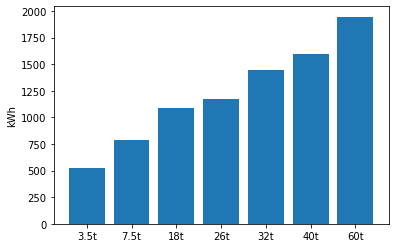

In [30]:
battery_cap = tm.array.sel(powertrain='BEV', year=2020, parameter='electric energy stored', value=0)
labels = tm.array.coords["size"].values.tolist()

plt.bar(labels, battery_cap)
plt.ylabel('kWh')
plt.show()

The same can be done considering uncertainties in input parameters (here with a 2020 40t truck), using a Monte Carlo approach

In [5]:
from carculator_truck import *
tip = TruckInputParameters()
# 50 iterations
tip.stochastic(50)
#tip.static()
dcts, array = fill_xarray_from_input_parameters(tip, scope={"size":["40t"], "year":[2020]})
tm = TruckModel(array, cycle="Long haul")
tm.set_all()

Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+
|                | 40t  |
+----------------+------+
|   BEV, 2020    | 0.36 |
|   FCEV, 2020   | 0.36 |
|  HEV-d, 2020   | 0.36 |
|  ICEV-d, 2020  | 0.36 |
|  ICEV-g, 2020  | 0.36 |
| PHEV-c-d, 2020 | 0.36 |
|  PHEV-d, 2020  | 0.36 |
|  PHEV-e, 2020  | 0.36 |
+----------------+------+
Finding solutions for trucks...


c:\users\sacchi_r\documents\github\carculator_truck\carculator_truck\model.py:390: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if "reference" in self.array.value.values:



Payload (in tons)
'-' BEV with driving mass superior to the permissible gross weight.
'*' ICEV that do not comply wih energy reduction target.
'/' vehicles not available for the specified year.
+--------------+-----+
|              | 40t |
+--------------+-----+
|  BEV, 2020   | 4.5 |
|  FCEV, 2020  | 9.5 |
| HEV-d, 2020  | 9.3 |
| ICEV-d, 2020 | 9.2 |
| ICEV-g, 2020 | 8.9 |
| PHEV-d, 2020 | 8.3 |
+--------------+-----+


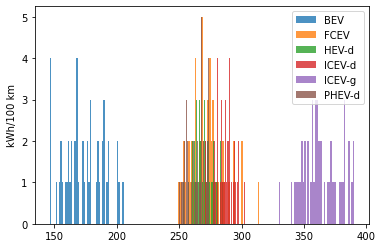

In [6]:
import matplotlib.pyplot as plt
TtW_energy = tm.array.sel(size='40t', year=2020, parameter='TtW energy') * 1/3600 * 100

l_powertrains = TtW_energy.powertrain
[plt.hist(e, bins=50, alpha=.8, label=e.powertrain.values) for e in TtW_energy]
plt.ylabel('kWh/100 km')
plt.legend()

Or in terms of km/L of petrol-equivalent

Urban delivery driving cycle is selected. Vehicles will be designed to achieve a minimal range of 150 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+
|                | 40t  |
+----------------+------+
|   BEV, 2020    | 0.35 |
|   FCEV, 2020   | 0.35 |
|  HEV-d, 2020   | 0.35 |
|  ICEV-d, 2020  | 0.35 |
|  ICEV-g, 2020  | 0.35 |
| PHEV-c-d, 2020 | 0.35 |
|  PHEV-d, 2020  | 0.35 |
|  PHEV-e, 2020  | 0.35 |
+----------------+------+
Finding solutions for trucks...


c:\users\sacchi_r\documents\github\carculator_truck\carculator_truck\model.py:390: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if "reference" in self.array.value.values:



Payload (in tons)
'-' BEV with driving mass superior to the permissible gross weight.
'*' ICEV that do not comply wih energy reduction target.
'/' vehicles not available for the specified year.
+--------------+-----+
|              | 40t |
+--------------+-----+
|  BEV, 2020   | 8.5 |
|  FCEV, 2020  | 9.2 |
| HEV-d, 2020  | 9.1 |
| ICEV-d, 2020 | 9.0 |
| ICEV-g, 2020 | 9.0 |
| PHEV-d, 2020 | 8.9 |
+--------------+-----+


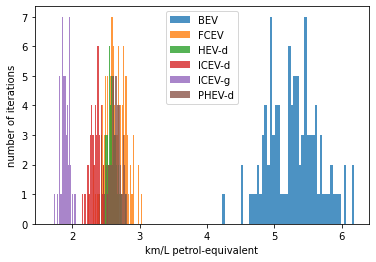

In [8]:
tip = TruckInputParameters()
tip.stochastic(100)
dcts, array = fill_xarray_from_input_parameters(tip, scope={"size":["40t"], "year":[2020]})
tm = TruckModel(array)
tm.set_all()
TtW_energy = 1 / (tm.array.sel(size='40t', year=2020, parameter='TtW energy') / 34200) # assuming 34.2 MJ/L petrol

l_powertrains = TtW_energy.powertrain
[plt.hist(e, bins=50, alpha=.8, label=e.powertrain.values) for e in TtW_energy]
plt.xlabel('km/L petrol-equivalent')
plt.ylabel('number of iterations')
plt.legend()

We can check the randomly generated values for any parameter like so. Here, for the tank to wheel energy in kWh/100 km.

In [10]:
tm.array.sel(size='40t', year=2020, parameter='TtW energy', powertrain="ICEV-g") * 1/3600 * 100

<xarray.DataArray (value: 100)>
array([483.93164, 514.9826 , 523.8718 , 492.95172, 510.92896, 510.6831 ,
       485.5091 , 509.08624, 522.6885 , 473.1441 , 505.47128, 519.6117 ,
       533.0595 , 507.203  , 489.80493, 518.4091 , 467.23108, 505.0746 ,
       527.7108 , 509.7868 , 485.2146 , 513.34766, 547.33386, 490.5164 ,
       496.3413 , 522.1571 , 498.78802, 531.959  , 521.78204, 526.8964 ,
       493.6747 , 499.3897 , 527.47046, 555.1498 , 503.17297, 525.56995,
       508.22824, 491.93982, 480.92093, 526.10736, 510.15982, 489.13232,
       484.59348, 516.7802 , 482.9289 , 550.2877 , 497.08252, 498.60712,
       485.0107 , 486.0446 , 476.0395 , 464.3476 , 462.75214, 507.31888,
       484.3049 , 495.8229 , 513.22644, 526.6266 , 569.54486, 493.77246,
       505.55807, 496.99518, 490.99237, 528.0923 , 525.6508 , 500.89087,
       524.8483 , 492.45325, 512.61273, 480.02686, 503.24222, 505.58606,
       502.584  , 484.61017, 513.76874, 482.065  , 499.64938, 503.58768,
       517.51166, 510.89645, 524.34   , 492.15582, 457.4542 , 479.79712,
       496.05173, 499.83426, 517.6192 , 508.32623, 486.74997, 523.294  ,
       508.2522 , 498.82306, 510.03323, 504.37366, 517.4876 , 507.41003,
       511.11078, 483.4313 , 493.3108 , 517.05914], dtype=float32)
Coordinates:
    size        <U3 '40t'
    powertrain  <U8 'ICEV-g'
    parameter   <U64 'TtW energy'
    year        int32 2020
  * value       (value) int32 0 1 2 3 4 5 6 7 8 9 ... 91 92 93 94 95 96 97 98 99

We can look at noise emissions. We see that most noise is emitted in urban environment. Noise emissions are dependent of the driving cycle chosen.

Text(0, 0.5, 'joules per km')

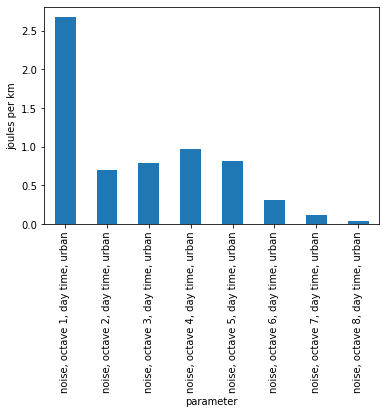

In [12]:
list_param = list(tm.array.parameter.values)
noise_emissions = [x for x in list_param if 'noise' in x]
data = tm.array.sel(parameter=noise_emissions, year=2020, size='40t', powertrain='ICEV-g', value=0)\
    .to_dataframe(name='noise emissions')['noise emissions']
data[data>0].plot(kind='bar')
plt.ylabel('joules per km')

### Calculation of the inventories

`InventoryCalculation` takes several arguments:

* `TruckModel`, mandatory: instance of TruckModel
* `scope`, optional: if you want to define a narrower scope in terms of years, powertrains and sizes
* `background_configuration`, optional: dictionary where specific parameters for electricity mix, battery technology, etc. can be defined
* `scenario`, optional: energy scenario that should be used. Can be "static", "SSP2-Base" or "SSP2-PkBudg1100". "SSP2-Base" is used if unspecified. More info on REMIND scenarios [here](https://github.com/romainsacchi/premise/blob/master/premise/data/remind_output_files/description.md)
* `method`, optional: impact characterization method that should be used. Can be: "recipe" or "ilcd". "recipe" is used if unspecified.
* `method_type`, optional: can be "midpoint" or "endpoint". Endpoint indicators only available for Recipe 2008. "midpoint" used if unspecified.


Hence, it can be as simple as this:

In [13]:
ic = InventoryCalculation(tm)

Or more complex, like this below, where:
* the scope is narrowed down to fewer 2020 vehicles,
* an electricity mix is defined (100% hydro)
* a battery type and place of manufacture are defined. Battery type can be "NMC", "NCA" or "LFP". Place of production can be any alpha-2 country code, in addition to "RER".
* a hydrogen tank type is defined. It can be "carbon fiber", "hdpe" or "aluminium". It refers to the lining system.
* a REMIND energy scenario is chosen
* the midpoint indicators of the Recipe 2008 method are selected.

In [26]:
scope={
    "powertrain":["ICEV-d", "BEV"],
    "size":["40t"],
    "year":[2020]
}

bc={
    "custom electricity mix": [
        [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    ],
    "energy storage": {
        "electric": {
            "type": "NMC-111",
            "origin": "NO"
        },
        "hydrogen": {
            "type": "carbon fiber"
        }
    }
}

ic = InventoryCalculation(tm,
                          scope=scope,
                          background_configuration=bc,
                          scenario="SSP2-PkBudg1300",
                          method="recipe",
                          method_type="endpoint")

We can have a look at the underlying technology matrix

In [27]:
ic.A

array([[[1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 1.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 1.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 1.]],

       ...,

       [[1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0.

The labels of its rows and columns

In [28]:
list(ic.inputs.keys())[:10]

[('Methane, fossil', ('air', 'urban air close to ground'), 'kilogram'),
 ('market for sheet rolling, aluminium',
  'GLO',
  'kilogram',
  'sheet rolling, aluminium'),
 ('electricity production, oil',
  'DE',
  'kilowatt hour',
  'electricity, high voltage'),
 ('market for corrugated board box',
  'RoW',
  'kilogram',
  'corrugated board box'),
 ('Dimethyl sulfoxide production (DMSO)',
  'RER',
  'kilogram',
  'Dimethyl sulfoxide'),
 ('casting, brass', 'CH', 'kilogram', 'casting, brass'),
 ('Module packaging', 'GLO', 'kilogram', 'Module packaging'),
 ('Formaldehyde', ('air', 'low population density, long-term'), 'kilogram'),
 ('Bimetallic busbars and washers',
  'GLO',
  'kilogram',
  'Bimetallic busbars and washers'),
 ('market for heat, district or industrial, natural gas',
  'Europe without Switzerland',
  'megajoule',
  'heat, district or industrial, natural gas')]

You can check the available indicators from the method you selected.

In [29]:
ic.impact_categories

{'Ecosystems': {'method': 'ReCiPe 2008 Endpoint (H, A) V1.13',
  'category': 'Ecosystems',
  'type': 'endpoint',
  'abbreviation': '',
  'unit': 'species.lost',
  'source': 'https://www.rivm.nl/documenten/6recipe111'},
 'Human health': {'method': 'ReCiPe 2008 Endpoint (H, A) V1.13',
  'category': 'Human health',
  'type': 'endpoint',
  'abbreviation': '',
  'unit': 'DALY',
  'source': 'https://www.rivm.nl/documenten/6recipe111'},
 'Resources': {'method': 'ReCiPe 2008 Endpoint (H, A) V1.13',
  'category': 'Resources',
  'type': 'endpoint',
  'abbreviation': '',
  'unit': 'USD',
  'source': 'https://www.rivm.nl/documenten/6recipe111'},
 'Noise': {'method': 'Cucurachi et al. 2019',
  'category': 'Noise',
  'type': 'endpoint',
  'abbreviation': '',
  'unit': 'DALY',
  'source': 'https://onlinelibrary.wiley.com/doi/full/10.1111/jiec.12837'}}

# Impact assessment

And then you can solve the inventories and characterize impacts.

In [30]:
results = ic.calculate_impacts()

****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is RER
 * Energy batteries produced in NO using NMC-111 chemistry.
 * in 2020, % of renewable: 100%, GHG intensity per kWh: 0 g. CO2-eq.
 * diesel is completed by biodiesel - cooking oil.
 	 * in 2020 _________________________________________ 2.0%
 * *********************************************************************


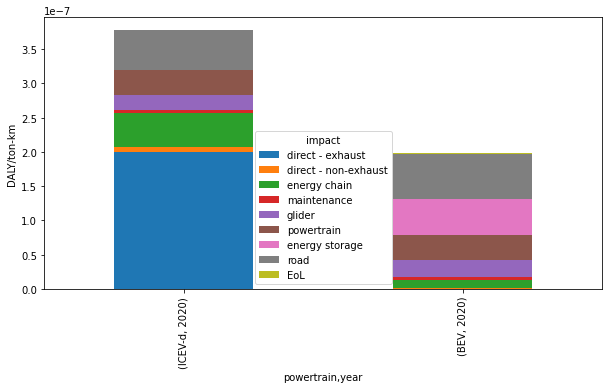

In [31]:
results.sel(impact_category='Human health', size='40t', value=0)\
    .to_dataframe('impact')\
    .unstack(level=2)['impact']\
    .plot(kind='bar',
                stacked=True,
         figsize=(10,5))
plt.ylabel('DALY/ton-km')
plt.show()

Or with uncertainty (50 iterations). We just need to specify the number of iterations to `.stochastic()`.

Note: only the uncertainty at the vehicle level (incl. its components) is considered. Hence, no uncertainty is considered in the "background" inventories (e.g., steel production), or at the impact assessment level.
The only uncertainty/sensitivity in the background inventories one can "appreciate", is the one relating to the different future energy scenarios, going from a moderate climate policy ("SSP2-Base") to am amitious one ("SSP2-PkBudg1100"). Those scenarios will affect the background inventories in regard to efficiencies of power production, penetration of renewables, etc.

To include uncertainty from the background inventories, you need to export the vehicle inventories to a LCA software (e.g., Brightway2) and link them to the ecoinvent database.

In [39]:
from carculator_truck import *
tip = TruckInputParameters()
tip.stochastic(150)

scope={
    "powertrain":["ICEV-d", "BEV", "FCEV", "ICEV-g"],
    "size":["40t"],
    "year":[2020]
}

dcts, array = fill_xarray_from_input_parameters(tip, scope=scope)

fuel_blend = {
    "diesel": {
        "primary": {
            "type": "diesel",
            "share": [0.5]
        },
        "secondary": {
            "type": "biodiesel - cooling oil",
            "share": [0.5]
        }
    }
}

tm = TruckModel(array, fuel_blend=fuel_blend)
tm.set_all()




bc={
    "custom electricity mix": [
        [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        
    ],
    "energy storage": {
        "electric": {
            "type": "NMC-111",
            "origin": "NO"
        },
        "hydrogen": {
            "type": "carbon fiber"
        }
    }
}

ic = InventoryCalculation(tm,
                          scope=scope,
                          background_configuration=bc,
                          scenario="SSP2-PkBudg1300",
                          method="recipe",
                          method_type="endpoint")

results = ic.calculate_impacts()

Urban delivery driving cycle is selected. Vehicles will be designed to achieve a minimal range of 150 km.

Capacity utilization assumed (share of available payload used)
+--------------+------+
|              | 40t  |
+--------------+------+
| ICEV-d, 2020 | 0.36 |
|  BEV, 2020   | 0.36 |
|  FCEV, 2020  | 0.36 |
| ICEV-g, 2020 | 0.36 |
+--------------+------+
Finding solutions for trucks...


c:\users\sacchi_r\documents\github\carculator_truck\carculator_truck\model.py:390: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if "reference" in self.array.value.values:



Payload (in tons)
'-' BEV with driving mass superior to the permissible gross weight.
'*' ICEV that do not comply wih energy reduction target.
'/' vehicles not available for the specified year.
+--------------+-----+
|              | 40t |
+--------------+-----+
| ICEV-d, 2020 | 9.2 |
|  BEV, 2020   | 8.6 |
|  FCEV, 2020  | 9.4 |
| ICEV-g, 2020 | 9.2 |
+--------------+-----+
****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is RER
 * Energy batteries produced in NO using NMC-111 chemistry.
 * in 2020, % of renewable: 100%, GHG intensity per kWh: 0 g. CO2-eq.
 * electrolysis is completed by smr - natural gas.
 	 * in 2020 _________________________________________ 0%
 * cng is completed by biogas - sewage sludge.
 	 * in 2020 _________________________________________ 2.0%
 * diesel is completed by biodiesel - cooking oil.
 	 * in 2020 _________________________________________ 50.0%
 * *************************************************************

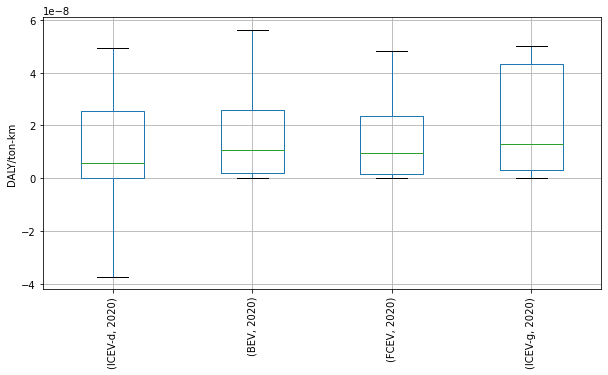

In [41]:
import matplotlib.pyplot as plt
results.sel(impact_category='Human health', size='40t', value=0)\
    .to_dataframe('impact')\
    .unstack()['impact'].T\
    .boxplot(showfliers=False,
         figsize=(10,5))
plt.ylabel('DALY/ton-km')
plt.xticks(rotation=90)
plt.show()

# Sensitivity analysis

`carculator_truck` has a function to calculate the sensitivity of characterized results in regard to the inputs parameters of `TruckModel`. This function generates a number of "scenarios" within which one input parameter has its value increased by 10%. The newly calculated results are stored and compared to the reference scneario (where none of the input parameter values are modified).

To do so, we run the model in **static** mode, but we give the argument `sensitivity=True` to `fill_xarray_from_input_parameters()` and `calculate_impacts()`.

In [1]:
from carculator_truck import *
import matplotlib.pyplot as plt
import numpy as np
tip = TruckInputParameters()
tip.static()

scope={
    "powertrain":["ICEV-d", "BEV", "FCEV", "ICEV-g"],
    "size":["40t"],
    "year":[2020]
}


_, array = fill_xarray_from_input_parameters(tip, sensitivity=True, scope=scope)
tm = TruckModel(array)
tm.set_all()

ic = InventoryCalculation(tm, scope={"size":["40t"], "powertrain":["ICEV-d", "BEV"], "year":[2020]})
res = ic.calculate_impacts(sensitivity=True)

Urban delivery driving cycle is selected. Vehicles will be designed to achieve a minimal range of 150 km.

Capacity utilization assumed (share of available payload used)
+--------------+------+
|              | 40t  |
+--------------+------+
| ICEV-d, 2020 | 0.36 |
|  BEV, 2020   | 0.36 |
|  FCEV, 2020  | 0.36 |
| ICEV-g, 2020 | 0.36 |
+--------------+------+
Finding solutions for trucks...

Payload (in tons)
'-' BEV with driving mass superior to the permissible gross weight.
'*' ICEV that do not comply wih energy reduction target.
'/' vehicles not available for the specified year.
+--------------+------+
|              | 40t  |
+--------------+------+
| ICEV-d, 2020 | 16.3 |
|  BEV, 2020   | 16.1 |
|  FCEV, 2020  | 16.4 |
| ICEV-g, 2020 | 16.3 |
+--------------+------+
****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is RER
 * Energy batteries produced in CN using NMC-111 chemistry.
 * in 2020, % of renewable: 39.0%, GHG intensity per kWh: 38

We retrieve an array that contains characterized results for a number of scenarios (where only one parameter value is increased in each scenario), normalized in regard to the reference scenario. Hence, values above 1 indicate that increasing the parameter value given in the `parameter` dimension of the array by 10% led to an increase in the characterized results (for the impact category selected).

We can turn the array into a `pandas` dataframe for better visualization. We can also remove the results that equal to 1 (which indicate that increasing the value of the selected parameter by 10% had no influence on the characterized result).

Let's see the result for a 40-ton battery electric vehicle in 2020, in regard to the impact category **Climate change**.

Text(0.5, 1.0, 'Parameters value increased by 10%')

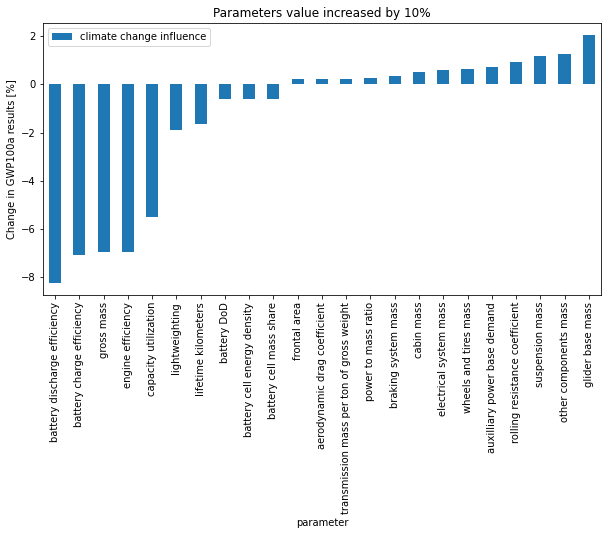

In [2]:
df = res.sel(impact_category="climate change", powertrain="BEV", size="40t", year=2020)\
    .to_dataframe("climate change influence")
df = df.loc[(df["climate change influence"] > 1.001)|(df["climate change influence"] < 1),:]
df["climate change influence"] -= 1 
df["climate change influence"] *= 100 
df = df.sort_values("climate change influence", ascending=True)
df.plot(y = "climate change influence", kind="bar", figsize=(10,5))
plt.ylabel("Change in GWP100a results [%]")
plt.title("Parameters value increased by 10%")

Therefore, we can see that the characterized results for **Climate change** are negatively influenced by changes of +10% in the parameter value for the charge and discharge efficiency of the battery as well as the drivetrain and engine efficiency.
The load factor and the energy density of cells are also important factors.

On the other end, the results are positively influenced by changes in the parameter value for the glider base mass, the mas s of the battery and the aerodynamic of the vehicle.

# Export inventories

Inventories in `static` calculation mode can be exported to different formats:
* as an Excel file compatible for import with `brightway2`
* a Brightway2 LCIImporter object
* a Python dictionary

## Export inventories without uncertainty 

Inventories are exported to an Excel file which can later be imported into `brightway2`. The `export_to_excel()` function returns the filepath where the Excel file can be found (the same directory as the script calling it).

In [3]:
from carculator_truck import *
import matplotlib.pyplot as plt
tip = TruckInputParameters()
tip.static()
dcts, array = fill_xarray_from_input_parameters(tip)
tm = TruckModel(array)
tm.set_all()

scope = {
    'powertrain':['ICEV-d', 'PHEV-d'],
}

ic = InventoryCalculation(tm, scope=scope)

Urban delivery driving cycle is selected. Vehicles will be designed to achieve a minimal range of 150 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+------+
|                | 3.5t | 7.5t | 18t  | 26t  | 32t  | 40t  | 60t  |
+----------------+------+------+------+------+------+------+------+
|   BEV, 2000    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2010    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2020    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2030    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2040    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2050    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2000   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2010   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2020   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2030

C:\Users\sacchi_r\AppData\Local\Continuum\miniconda3\envs\main_env\lib\site-packages\xarray\core\dataarray.py:746: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return key in self.data


Here is the call to export the inventories as a Brightway2-compatible Excel file.
Note that you can specify a directory where the file should be saved.
Otherwise, it will be saved in the root directory of `carculator_truck`

In [ ]:
i, _ = ic.export_lci_to_excel(software_compatibility="brightway2",
                              ecoinvent_version='3.6',
                              directory=r"a_file/path/here")

If you want instead to use the inventories in SimaPro 9:

In [ ]:
i, _ = ic.export_lci_to_excel(software_compatibility="simapro",
                              ecoinvent_version='3.6',
                              directory=r"a_file/path/here")

Here, the inventory is instead returned as a `brightway2` LCIImporter object, which can be directly registered into `brightway2`.

Currently, the inventories can be exported so as to link with **ecoinvent cut-off** 3.5 and 3.6. The ecoinvent version can be specified in the `ecoinvent_version` argument.

In [27]:
i, _ = ic.export_lci_to_bw(ecoinvent_version='3.6')

****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is RER
 * Energy batteries produced in CN using NMC chemistry.
 * in 2000, % of renewable: 17.0%, GHG intensity per kWh: 0 g. CO2-eq.
 	 * in 2010, % of renewable: 28.0%, GHG intensity per kWh: 0 g. CO2-eq.
 	 * in 2020, % of renewable: 39.0%, GHG intensity per kWh: 0 g. CO2-eq.
 	 * in 2030, % of renewable: 45.0%, GHG intensity per kWh: 0 g. CO2-eq.
 	 * in 2040, % of renewable: 51.0%, GHG intensity per kWh: 0 g. CO2-eq.
 	 * in 2050, % of renewable: 55.0%, GHG intensity per kWh: 0 g. CO2-eq.
 * diesel is completed by biodiesel - cooking oil.
 	 * in 2000 _________________________________________ 0.0%
 	 * in 2010 _________________________________________ 1.0%
 	 * in 2020 _________________________________________ 2.0%
 	 * in 2030 _________________________________________ 6.0%
 	 * in 2040 _________________________________________ 8.0%
 	 * in 2050 _________________________________________ 12.

0% [##############################] 100% | ETA: 00:00:00 | Item ID: 821
Total time elapsed: 00:00:00


In [30]:
import brightway2 as bw
bw.projects.set_current('import_36_for_carculator')

i.apply_strategies()

i.match_database(fields=["name", "unit", "location"])
if 'additional_biosphere' not in bw.databases:
    i.create_new_biosphere('additional_biosphere')
i.match_database("ecoinvent 3.6 cutoff",  fields=["reference product", "name", "unit", "location"])
i.match_database('biosphere3',  fields=["name", "unit", "categories"])
i.match_database('additional_biosphere',  fields=["name", "unit", "categories"])

i.statistics()
i.write_database()

Applying strategy: normalize_units
Applying strategy: drop_unspecified_subcategories
Applying strategy: assign_only_product_as_production
Applying strategy: strip_biosphere_exc_locations
Applied 4 strategies in 0.01 seconds
Applying strategy: link_iterable_by_fields
Applying strategy: link_iterable_by_fields
Applying strategy: link_iterable_by_fields
Applying strategy: link_iterable_by_fields
295 datasets
5854 exchanges
0 unlinked exchanges
  


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:02


Title: Writing activities to SQLite3 database:
  Started: 09/28/2020 19:47:54
  Finished: 09/28/2020 19:47:56
  Total time elapsed: 00:00:02
  CPU %: 30.80
  Memory %: 23.41
Created database: carculator db


Brightway2 SQLiteBackend: carculator db

Once the export database registered, the user can perform LCAs, like so:

In [31]:
FU = [{a:1} for a in bw.Database("carculator db") if "ICEV-d" in a["name"] and "2020" in a["name"]]
FU

[{'Heavy duty truck, ICEV-d, 40t gross weight, 2020, EURO-VI' (ton-kilometer, RER, None): 1},
 {'Medium duty truck, ICEV-d, 26t gross weight, 2020, EURO-VI' (ton-kilometer, RER, None): 1},
 {'Medium duty truck, ICEV-d, 18t gross weight, 2020, EURO-VI' (ton-kilometer, RER, None): 1},
 {'Heavy duty truck, ICEV-d, 60t gross weight, 2020, EURO-VI' (ton-kilometer, RER, None): 1},
 {'Medium duty truck, ICEV-d, 3.5t gross weight, 2020, EURO-VI' (ton-kilometer, RER, None): 1},
 {'Medium duty truck, ICEV-d, 7.5t gross weight, 2020, EURO-VI' (ton-kilometer, RER, None): 1}]

In [32]:
import pandas as pd
bw.calculation_setups['multiLCA'] = {'inv': FU, 'ia': [('IPCC 2013', 'climate change', 'GWP 100a')]}
myMultiLCA = bw.MultiLCA('multiLCA')
df_impact = pd.DataFrame(columns = [('IPCC 2013', 'climate change', 'GWP 100a')],
                         data = myMultiLCA.results,
                         index=[(k['name'], k['location'], k["database"]) for i in FU for k in i])


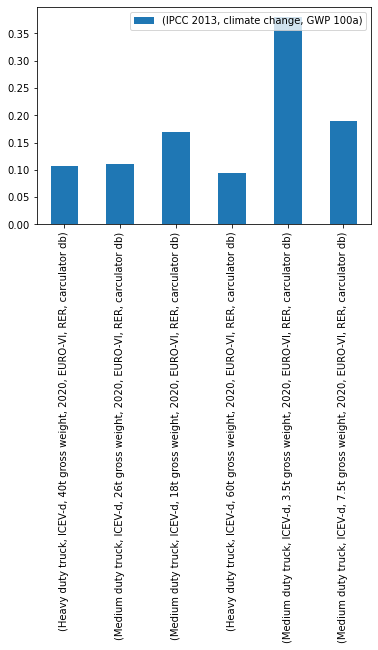

In [33]:
df_impact.plot(kind="bar", stacked=True)

Because the exchanges of the export inventories are tagged by main impact categories (e.g., direct, glider, powertrain, maintenance, etc.), it is also possible to do a contribution analysis by traversing the supply chain of the product system:

In [34]:
import bw2analyzer as bw2a
d = bw2a.traverse_tagged_databases(FU[0], ('IPCC 2013', 'climate change', 'GWP 100a'))
d[0]

defaultdict(int,
            {'other': 0.0187563286639458,
             'direct - exhaust': 0.07605538612410703,
             'energy chain': 0.01156049759572285,
             'energy storage': 0.0,
             'glider': 8.711647996311385e-05})

Also, the inventories can be made compatible with modified ecoinvent databases, such as those from `premise` (https://github.com/romainsacchi/premise), to allow for prospective LCA. In such case, the argument `ecoinvent_compatibility` must be set to `False`.

In [13]:
i, _ = ic.export_lci_to_bw(ecoinvent_compatibility=False)

****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is CH
 * Power and energy batteries produced in NO using NMC chemistry.
 * in 2000, % of renewable: 100%, GHG intensity per kWh: 4 g. CO2-eq.
 	 * in 2010, % of renewable: 100%, GHG intensity per kWh: 11 g. CO2-eq.
 	 * in 2017, % of renewable: 100%, GHG intensity per kWh: 675 g. CO2-eq.
 	 * in 2040, % of renewable: 100%, GHG intensity per kWh: 76 g. CO2-eq.
 * electrolysis is completed by smr - natural gas.
 	 * in 2000 _________________________________________ 0%
 	 * in 2010 _________________________________________ 100%
 	 * in 2017 _________________________________________ 100%
 	 * in 2040 _________________________________________ 100%
 * petrol is completed by bioethanol - wheat straw.
 	 * in 2000 _________________________________________ 10.0%
 	 * in 2010 _________________________________________ 20.0%
 	 * in 2017 _________________________________________ 30.0%
 	 * in 2040 _________

0% [##############################] 100% | ETA: 00:00:00 | Item ID: 744
Total time elapsed: 00:00:00


Finally, the inventory can be exported as a Python dictionary

In [6]:
lci, _ = ic.export_lci()

0% [##############################] 100% | ETA: 00:00:00 | Item ID: 691
Total time elapsed: 00:00:00


In [7]:
lci[0]

{'production amount': 1,
 'database': 'carculator export',
 'name': 'Electricity, high voltage, natural gas CCPP, at grid',
 'unit': 'kilowatt hour',
 'location': 'RER',
 'exchanges': [{'name': 'Electricity, high voltage, natural gas CCPP, at grid',
   'database': 'carculator export',
   'amount': 1.0,
   'unit': 'kilowatt hour',
   'type': 'production',
   'location': 'RER',
   'reference product': 'Electricity, high voltage, natural gas CCPP, at grid',
   'uncertainty type': 0},
  {'name': 'transmission network construction, long-distance',
   'database': 'carculator export',
   'amount': 3.17e-10,
   'unit': 'kilometer',
   'type': 'technosphere',
   'location': 'UCTE',
   'reference product': 'transmission network, long-distance',
   'uncertainty type': 0},
  {'name': 'Ozone',
   'database': 'biosphere3',
   'amount': 4.158e-06,
   'unit': 'kilogram',
   'type': 'biosphere',
   'categories': ('air',),
   'uncertainty type': 0},
  {'name': 'electricity production, natural gas, combi

# Export inventories with uncertainty

Additionally, if the model has been run in `stochastic` mode, the exported inventories will include uncertainty information. The uncertainty of a given exchange is expressed as an array of values to be reused for pre-sampling by `brightway2`.

Therefore, alongside the inventory, an array that stores the pre-sampled random values generated by CarModel for each uncertain exchange is returned. This array of pre-sampled values can then be passed to the Monte Carlo function of `brightway2` which will use these values instead of randomly generated ones. This has the advantage of preserving the relation between inputs and outputs of a same activity.


In [1]:
from carculator_truck import *
import matplotlib.pyplot as plt
tip = TruckInputParameters()
# 1000 iterations
tip.stochastic(10)
_, array = fill_xarray_from_input_parameters(tip)
array = array.interp(year=[2020, 2025],  kwargs={'fill_value': 'extrapolate'})
tm = TruckModel(array)
tm.set_all() 

Urban delivery driving cycle is selected. Vehicles will be designed to achieve a minimal range of 150 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+
|                | 18t  | 26t  | 3.5t | 40t  | 60t  | 7.5t |
+----------------+------+------+------+------+------+------+
|   BEV, 2020    | 0.63 | 0.72 | 0.74 | 0.74 | 0.73 | 0.75 |
|   BEV, 2025    | 0.64 | 0.73 | 0.74 | 0.75 | 0.74 | 0.74 |
|   FCEV, 2020   | 0.63 | 0.72 | 0.74 | 0.74 | 0.73 | 0.75 |
|   FCEV, 2025   | 0.64 | 0.73 | 0.74 | 0.75 | 0.74 | 0.74 |
|  HEV-d, 2020   | 0.63 | 0.72 | 0.74 | 0.74 | 0.73 | 0.75 |
|  HEV-d, 2025   | 0.64 | 0.73 | 0.74 | 0.75 | 0.74 | 0.74 |
|  ICEV-d, 2020  | 0.63 | 0.72 | 0.74 | 0.74 | 0.73 | 0.75 |
|  ICEV-d, 2025  | 0.64 | 0.73 | 0.74 | 0.75 | 0.74 | 0.74 |
|  ICEV-g, 2020  | 0.63 | 0.72 | 0.74 | 0.74 | 0.73 | 0.75 |
|  ICEV-g, 2025  | 0.64 | 0.73 | 0.74 | 0.75 | 0.74 | 0.74 |
| PHEV-c-d, 2020 | 0.63 | 0.72 | 0.74

c:\users\romai\documents\github\carculator_truck\carculator_truck\model.py:326: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if "reference" in self.array.value.values:



Payload (in tons)
Vehicles for which the payload is not specified have either: 
1. a driving mass superior to the permissible gross weight. Possible solutions include: reducing the range autonomy for those vehicles, reducing the load factor, increasing the battery cell energy density.
2. an energy efficiency too low to comply with the energy target specified. Possible solutions include: changing the energy reduction targets specified, increasing the engine efficiency.
+--------------+-----+------+------+------+------+------+
|              | 18t | 26t  | 3.5t | 40t  | 60t  | 7.5t |
+--------------+-----+------+------+------+------+------+
| ICEV-d, 2020 | 6.5 | 12.3 | 1.1  | 19.0 | 28.9 | 2.7  |
| ICEV-d, 2025 | 6.9 | 12.9 | 1.2  | 20.0 | 30.1 | 2.9  |
| ICEV-g, 2020 | 6.3 | 12.1 | 0.9  | 18.8 | 28.7 | 2.6  |
| ICEV-g, 2025 | 6.8 | 12.7 | 1.1  | 19.7 | 29.9 | 2.7  |
| PHEV-d, 2020 | 6.3 | 11.9 | 1.1  | 18.4 | 28.1 | 2.6  |
| PHEV-d, 2025 | 6.8 | 12.6 | 1.2  | 19.6 | 29.5 | 2.8  |
|  F

Build the inventory for a 40t diesel truck in 2025

In [2]:
ic = InventoryCalculation(tm, scope={"size":['40t'], "powertrain":['ICEV-d'], "year":[2025]})

Receive the inventory as a brightway2 LCIImporter object, as well as the arrays that contain pre-sampled values

In [3]:
lci, arr = ic.export_lci_to_bw(db_name="inventory with presamples")

****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is RER
 * Energy batteries produced in CN using NMC chemistry.
 * in 2025, % of renewable: 43.0%, GHG intensity per kWh: 0 g. CO2-eq.
 * diesel is completed by biodiesel - cooking oil.
 	 * in 2025 _________________________________________ 2.0%
 * *********************************************************************


0% [##############################] 100% | ETA: 00:00:00 | Item ID: 729
Total time elapsed: 00:00:00


Open a brightway2 project where ecoinvent 3.6 is installed

In [39]:
import brightway2 as bw
bw.projects.set_current('import_36_for_carculator')

Import the inventory into the Brightway project

In [42]:
import bw2io
i = lci
if "additional_biosphere" in bw.databases:
    del bw.databases['additional_biosphere']

i.apply_strategies()

i.match_database('ecoinvent 3.6 cutoff', fields=('name', 'unit', 'location', 'reference product'))
i.match_database("biosphere3", fields=('name', 'unit', 'categories'))

i.match_database(fields=('name', 'unit', 'location', 'reference product'))
i.match_database(fields=('name', 'unit', 'categories'))
i.create_new_biosphere("additional_biosphere", relink=False)
i.match_database("additional_biosphere", fields=('name', 'unit', 'categories'))
i.statistics()
i.write_database()

Applying strategy: normalize_units
Applying strategy: drop_unspecified_subcategories
Applying strategy: assign_only_product_as_production
Applying strategy: strip_biosphere_exc_locations
Applied 4 strategies in 0.01 seconds
Applying strategy: link_iterable_by_fields
Applying strategy: link_iterable_by_fields
Applying strategy: link_iterable_by_fields
Applying strategy: link_iterable_by_fields
Creating new biosphere database: additional_biosphere
Applying strategy: link_iterable_by_fields
203 datasets
1780 exchanges
0 unlinked exchanges
  


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 09/28/2020 19:52:27
  Finished: 09/28/2020 19:52:28
  Total time elapsed: 00:00:00
  CPU %: 30.80
  Memory %: 24.19
Created database: inventory with presamples


Brightway2 SQLiteBackend: inventory with presamples

While simple LCA calculations can be directly performed on the newly imported inventory, for Monte Carlo analyses with presamples, the imported inventory needs to be merged with the ecoinvent database.
Merge the newly imported inventory with ecoinvent 3.6

In [43]:
import bw2data
bw2data.utils.merge_databases('ecoinvent 3.6 cutoff', 'inventory with presamples')

We need to reformat the pre-samples array with the correct activity codes

In [44]:
l_flows = []
for a in arr:
    l_flows.extend([a[1][0][0], a[1][0][1]])

l_flows = set(l_flows)
d_flows = {}


for ds in bw.Database('biosphere3'):
    if (ds['name'], tuple(ds['categories']), ds['unit']) in l_flows:
        d_flows[(ds['name'], tuple(ds['categories']), ds['unit'])] = (ds['database'], ds['code'])

for ds in bw.Database('carculator export'):
    if (ds['name'], ds['location'], ds['unit'], ds['reference product']) in l_flows:
        d_flows[(ds['name'], ds['location'], ds['unit'], ds['reference product'])] = (ds['database'], ds['code'])
        
for ds in bw.Database('ecoinvent 3.6 cutoff'):
    if (ds['name'], ds['location'], ds['unit'], ds['reference product']) in l_flows:
        d_flows[(ds['name'], ds['location'], ds['unit'], ds['reference product'])] = (ds['database'], ds['code'])


        
presamples_arr = []     
for a in range(0,len(arr)):
    if arr[a][1][0][0] in d_flows:
        presamples_arr.append(
            (arr[a][0].reshape((1,-1)),
                  [(d_flows[arr[a][1][0][0]],
                   d_flows[arr[a][1][0][1]],
                   arr[a][1][0][2])],
                  arr[a][2]))

Then, we build a matrix that contains the arrays with the presampled values, to be consumed by the Monte Carlo function

In [45]:
# Build the pre-samples array
import presamples
pp_id, stochastic_filepath = presamples.create_presamples_package(presamples_arr, name='presamples_carculator')

In [46]:
# Build the functional unit
multi_FU = [{a:1} for a in bw.Database('ecoinvent 3.6 cutoff') if '40t' in a['name']][:5]
multi_FU

[{'Heavy duty truck, ICEV-d, 40t gross weight, 2025, EURO-VI' (ton-kilometer, RER, None): 1}]

We then run the Monte Carlo function by giving it the matrix of presamples as an argument

In [48]:
# Run the Monte Carlo analysis with the pre-samples array
import numpy as np
iterations=50
results = np.zeros((iterations, len(multi_FU)))
mc = bw.MonteCarloLCA(multi_FU[0], ('IPCC 2013', 'climate change', 'GWP 100a'), presamples=[stochastic_filepath])

for i in range(iterations):
    print(i)
    next(mc)
    for j, fu in enumerate(multi_FU):
        mc.redo_lcia(fu)
        results[i, j] = mc.score

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


We can now visualize the results: a Monte Carlo analysis where randomly generated values for inputs and ouputs preserve their relations.

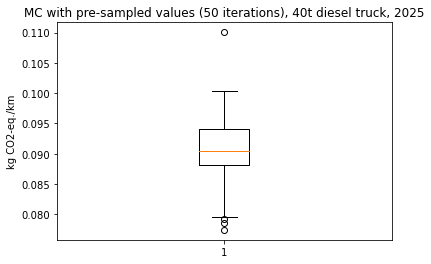

In [49]:
import matplotlib.pyplot as plt
plt.boxplot(results)
plt.title('MC with pre-sampled values (50 iterations), 40t diesel truck, 2025')
plt.ylabel("kg CO2-eq./km")
plt.show()